In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from time import time
%pylab inline
pd.set_option('display.max_columns', None)

data_dir = '/home/flowcast/data/python/data_validate_180315/'

Populating the interactive namespace from numpy and matplotlib


In [2]:

data = pd.read_csv(data_dir + 'all_prod_validate_180319.csv')

/data/flowcast/data/software/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(len(data))
data.head()

296591


,cty_code,doc_id,supplier_id,buyer_id,doc_type_code,deal_id,fin_flag,rec_id,doc_date,doc_ccy_code,doc_ccy_amt,tenor,tenor_start_date,due_date,grace_period,maturity_date,fin_tenor_start_date,fin_tenor,to_seq_no,from_seq_no,pymt_ccy_code,pymt_alloc_amt,fin_ccy_code,fin_ccy_cp_alloc_amt,fin_ccy_ncp_alloc_amt,fin_ccy_ncp_os_amt,fin_ccy_cp_os_amt,fin_ccy_amt,os_ccy_amt,fin_date,sale_ledger_flag,pool_based_flag,step_code,product_variant_code,rel_seq_no,pymt_date,settled_flag,late_days,finance_days,finance_due_days,isLate,late_days_bucket,fin_xrate,pymt_xrate,doc_xrate,doc_usd_amt,fin_usd_amt,os_usd_amt,pymt_usd_amt,dr,dr_bucket,product_
0,AE,RFHLM9WX4V-89034,100369293,100244505.0,INV,TF123BF562,Y,6728531788,2017-03-24,USD,113268.50,45,2017-03-24 00:00:00,2017-05-08,0,2017-05-08,2017-03-25 00:00:00,44.0,37.0,1,USD,113268.50,USD,0.0,113268.50,0.0,0.0,113268.50,0.0,2017-03-25,Y,N,SETT,IFNB02,37.0,2017-05-04,Y,0,40,44,0,0,1.000000,1.000000,1.000000,113268.500000,113268.500000,0.0,113268.500000,0.0,0,IFNB
1,AE,V5HKSF85PW-36933,100369293,100244505.0,INV,TF123BF144,Y,783293897,2017-03-10,USD,106717.15,45,2017-03-10 00:00:00,2017-04-24,0,2017-04-24,2017-03-11 00:00:00,44.0,29.0,1,USD,106717.15,USD,0.0,106717.15,0.0,0.0,106717.15,0.0,2017-03-11,Y,N,SETT,IFNB02,29.0,2017-04-09,Y,0,29,44,0,0,1.000000,1.000000,1.000000,106717.150000,106717.150000,0.0,106717.150000,0.0,0,IFNB
2,CN,52HNXCS9NQ-6901,100399400,100310713.0,INV,TF675BK822,Y,6765119598,2017-03-14,CNY,101409.08,30,2017-03-14 00:00:00,2017-04-13,158,2017-09-18,2017-04-10 00:00:00,161.0,116.0,1,CNY,101409.08,CNY,0.0,101409.08,0.0,0.0,101409.08,0.0,2017-04-10,Y,N,SETT,IFNB02,116.0,2017-09-18,Y,158,161,3,1,2,0.145113,0.152346,0.144957,14699.950219,14715.763589,0.0,15449.299138,0.0,0,IFNB
3,CN,52HNXCS9NQ-6902,100399400,100310713.0,INV,TF675BK822,Y,6765119600,2017-03-20,CNY,197106.76,24,2017-03-20 00:00:00,2017-04-13,158,2017-09-18,2017-04-10 00:00:00,161.0,116.0,1,CNY,197106.76,CNY,0.0,197106.76,0.0,0.0,197106.76,0.0,2017-04-10,Y,N,SETT,IFNB02,116.0,2017-09-18,Y,158,161,3,1,2,0.145113,0.152346,0.144957,28571.993355,28602.729480,0.0,30028.487562,0.0,0,IFNB
4,CN,52HNXCS9NQ-6968,100399400,100310713.0,INV,TF675BK822,Y,6745980446,2017-03-15,CNY,101536.00,29,2017-03-15 00:00:00,2017-04-13,158,2017-09-18,2017-04-10 00:00:00,161.0,116.0,1,CNY,101536.00,CNY,0.0,101536.00,0.0,0.0,101536.00,0.0,2017-04-10,Y,N,SETT,IFNB02,116.0,2017-09-18,Y,158,161,3,1,2,0.145113,0.152346,0.144957,14718.348155,14734.181316,0.0,15468.634932,0.0,0,IFNB


In [4]:
x_rate = pd.read_csv('/home/flowcast/data/python/external_data/daily_x_rate.csv') #write code that pull data
print(len(x_rate))
x_rate.head()

82590


,CCY,Date,Rate
0,AED,3/1/08 23:58,0.272287
1,AED,3/2/08 23:58,0.272294
2,AED,3/3/08 23:58,0.272287
3,AED,3/4/08 23:58,0.272287
4,AED,3/5/08 23:58,0.272287


In [5]:
x_rate = x_rate[['CCY', 'Date', 'Rate']]

In [6]:
def cv(data_array):
    try:
        return round(np.std(data_array)/ np.mean(data_array),5)
    except:
        return 0

In [7]:
x_rate['Date'] = [str(pd.to_datetime(x)) for x in x_rate.Date]
x_rate.Date[334:454]

334    2009-05-01 23:58:00
335    2009-05-04 23:58:00
336    2009-05-05 23:58:00
337    2009-05-06 23:58:00
338    2009-05-07 23:58:00
339    2009-05-08 23:58:00
340    2009-05-11 23:58:00
341    2009-05-12 23:58:00
342    2009-05-13 23:58:00
343    2009-05-14 23:58:00
344    2009-05-15 23:58:00
345    2009-05-18 23:58:00
346    2009-05-19 23:58:00
347    2009-05-20 23:58:00
348    2009-05-21 23:58:00
349    2009-05-22 23:58:00
350    2009-05-25 23:58:00
351    2009-05-26 23:58:00
352    2009-05-27 23:58:00
353    2009-05-28 23:58:00
354    2009-05-29 23:58:00
355    2009-06-01 23:58:00
356    2009-06-02 23:58:00
357    2009-06-03 23:58:00
358    2009-06-04 23:58:00
359    2009-06-05 23:58:00
360    2009-06-08 23:58:00
361    2009-06-09 23:58:00
362    2009-06-10 23:58:00
363    2009-06-11 23:58:00
              ...         
424    2009-09-04 23:58:00
425    2009-09-07 23:58:00
426    2009-09-08 23:58:00
427    2009-09-09 23:58:00
428    2009-09-10 23:58:00
429    2009-09-11 23:58:00
4

### ALL DATA

 > sort and reindex data 
> list of unique ccy-codes 
 > run on all



In [14]:
data_run = data

In [17]:
len(data_run)

296591

In [18]:
data_run.dropna(inplace= True)

In [19]:
# > sort and reindex data
data_run.sort_values(['fin_ccy_code','fin_date'], ascending=True, inplace=True)
data_run.index = range(0,len(data_run))
data_run['rownum'] = data_run.index
data_run[['doc_id', 'fin_ccy_code', 'fin_date', 'fin_usd_amt', 'fin_ccy_amt', 'due_date', 'maturity_date', 
             'doc_date', 'tenor', 'fin_tenor']].head(20)

# > list of unique ccy-codes
CCY_list = list(pd.unique(data_run.fin_ccy_code))
CCY_list

# > run on all

s = time()
cv_features = []

#loop by ccy
for ccy in CCY_list:
    
    ccy_sub = x_rate[x_rate.CCY==ccy]
    data_sub = data_run[data_run.fin_ccy_code == ccy]
    print(ccy, len(data_sub))
    for i in range(min(data_sub.rownum), max(data_sub.rownum)+1):
#         if i>1000: break #trial
        cv_=[ccy, data_sub.doc_id[i]]
        #dates
        fin_date = pd.to_datetime(data_sub.fin_date[i])
        prev_wk = str(fin_date - pd.DateOffset(days = 7))
        prev_3m =str(fin_date - pd.DateOffset(months = 3))
        prev_6m = str(fin_date - pd.DateOffset(months = 6))
        prev_yr = str(fin_date - pd.DateOffset(months = 12))
        prev_tenor = str(fin_date - pd.DateOffset(days = data_sub.tenor[i]))
        prev_fin_tenor = str(fin_date - pd.DateOffset(days = data_sub.fin_tenor[i]))
        
        #loop through all dates
        prev_dates = [prev_wk, prev_3m, prev_6m, prev_yr, prev_tenor, prev_fin_tenor]
        for x_date in prev_dates:
            cv_.append(cv(np.asarray(ccy_sub[
                                    (ccy_sub.Date < str(fin_date))
                                    & (ccy_sub.Date >= x_date)
                                   ].Rate)))
#         print(i, cv_)
        cv_features.append(cv_)
print('run_time: ',(time()-s)/60)
print(len(cv_features))
cv_features
cv_features_df = pd.DataFrame(cv_features, columns=['ccy_gen','doc_id','ccy_wk', 'ccy_3m', 'ccy_6m', 'ccy_yr', 
                                                    'ccy_tenor', 'ccy_fintenor'])

cv_features_df.describe()

('AED', 1113)
('AUD', 82)
('CHF', 244)
('CNY', 13)
('EUR', 6317)
('GBP', 271)
('IDR', 2360)
('INR', 17687)
('JPY', 53)
('LKR', 34707)
('MYR', 514)
('NZD', 1)
('PHP', 1706)
('PKR', 2419)
('SGD', 3)
('THB', 103214)
('USD', 125876)
('ZAR', 8)
('run_time: ', 32.47214411497116)
296588


,ccy_wk,ccy_3m,ccy_6m,ccy_yr,ccy_tenor,ccy_fintenor
count,170712.000000,170712.000000,170712.000000,170712.000000,168454.000000,170711.000000
mean,0.001769,0.007309,0.012639,0.018355,0.004596,0.005561
std,0.001131,0.003433,0.004372,0.006454,0.002942,0.003195
min,0.000000,0.000020,0.000020,0.000030,0.000000,0.000000
25%,0.000950,0.003850,0.010600,0.013180,0.002670,0.003030
50%,0.001530,0.007700,0.013380,0.017620,0.003630,0.004660
75%,0.002310,0.009480,0.015560,0.024200,0.006290,0.007955
max,0.011600,0.026990,0.052900,0.063920,0.031260,0.032160


In [20]:
cv_features_df.to_csv(data_dir+ 'ccy_features_vol.csv', index = False)

### new features: directions

In [21]:
def dir_sd(prev_array, current_scalar):
    #calculates how many std away from mean [of prev_array] current_scalar is 
    
    try:
        if np.std(np.asarray(prev_array))==0: 
            return 0
        else:
            return round((current_scalar - np.mean(np.asarray(prev_array)))/np.std(np.asarray(prev_array)),2)
    except:
        return 0

In [22]:
# > sort and reindex data
data_run.sort_values(['fin_ccy_code','fin_date'], ascending=True, inplace=True)
data_run.index = range(0,len(data_run))
data_run['rownum'] = data_run.index
data_run[['doc_id', 'fin_ccy_code', 'fin_date', 'fin_usd_amt', 'fin_ccy_amt', 'due_date', 'maturity_date', 
             'doc_date', 'tenor', 'fin_tenor']].head(20)

# > list of unique ccy-codes
CCY_list = list(pd.unique(data_run.fin_ccy_code))
CCY_list

# > run on all

s = time()
dir_features = []

#loop by ccy
for ccy in CCY_list:
    
    ccy_sub = x_rate[x_rate.CCY==ccy]
    data_sub = data_run[data_run.fin_ccy_code == ccy]
    print(ccy, len(data_sub))
    for i in range(min(data_sub.rownum), max(data_sub.rownum)+1):
#         if i>100: break #trial
        dir_=[ccy, data_sub.doc_id[i]]
        #dates
        fin_date = pd.to_datetime(data_sub.fin_date[i])
        prev_wk = str(fin_date - pd.DateOffset(days = 7))
        prev_3m =str(fin_date - pd.DateOffset(months = 3))
        prev_6m = str(fin_date - pd.DateOffset(months = 6))
        prev_yr = str(fin_date - pd.DateOffset(months = 12))
        prev_tenor = str(fin_date - pd.DateOffset(days = data_sub.tenor[i]))
        prev_fin_tenor = str(fin_date - pd.DateOffset(days = data_sub.fin_tenor[i]))
        
        #loop through all dates
        prev_dates = [prev_wk, prev_3m, prev_6m, prev_yr, prev_tenor, prev_fin_tenor]
        for x_date in prev_dates:
            
            dir_.append(dir_sd(np.asarray(ccy_sub[
                                    (ccy_sub.Date < str(fin_date))
                                    & (ccy_sub.Date >= x_date)
                                   ].Rate), data_sub.fin_xrate[i]))
#         print(i, dir_)
        dir_features.append(dir_)
print('run_time: ',(time()-s)/60)
print(len(dir_features))
# cv_features
dir_features = pd.DataFrame(dir_features, columns=['ccy_gen','doc_id','ccy_wk', 'ccy_3m', 'ccy_6m', 'ccy_yr', 
                                                    'ccy_tenor', 'ccy_fintenor'])

dir_features.describe()

('AED', 1113)
('AUD', 82)
('CHF', 244)
('CNY', 13)
('EUR', 6317)
('GBP', 271)
('IDR', 2360)
('INR', 17687)
('JPY', 53)
('LKR', 34707)
('MYR', 514)
('NZD', 1)
('PHP', 1706)
('PKR', 2419)
('SGD', 3)
('THB', 103214)
('USD', 125876)
('ZAR', 8)
('run_time: ', 33.961460900306705)
296588


,ccy_wk,ccy_3m,ccy_6m,ccy_yr,ccy_tenor,ccy_fintenor
count,1.707120e+05,170712.000000,170712.000000,170712.000000,168454.000000,170711.000000
mean,8.837360e+07,3.172645,2.011302,1.833850,6.067996,5.680874
std,9.850515e+09,136.649002,63.528315,48.658582,327.062393,310.222131
min,-9.476155e+10,-90.720000,-42.260000,-16.780000,-160.380000,-160.380000
25%,-1.180000e+00,-0.180000,-0.240000,-0.460000,-0.190000,-0.190000
50%,-4.000000e-01,0.980000,1.270000,1.500000,0.400000,0.670000
75%,1.420000e+00,1.480000,1.600000,1.870000,1.080000,1.240000
max,1.012073e+12,22973.790000,11668.710000,5025.010000,51077.550000,51077.550000


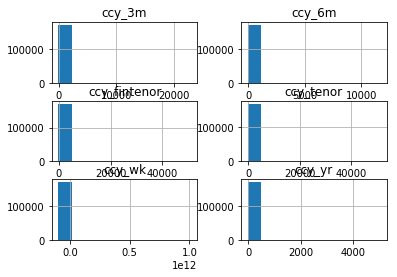

In [23]:
dir_features.hist();

In [24]:
dir_features.to_csv(data_dir+ 'ccy_features_vector.csv', index = False)